In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

# IQR-InterQuartile Range 

In [2]:
df=pd.read_csv("placement.csv")

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


C:\Users\acer\AppData\Local\Temp\ipykernel_2236\934247281.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(df["cgpa"])
C:\Users\acer\AppData\Local\Temp\ipykernel_2236\934247281.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(df["placement_exam_marks"])


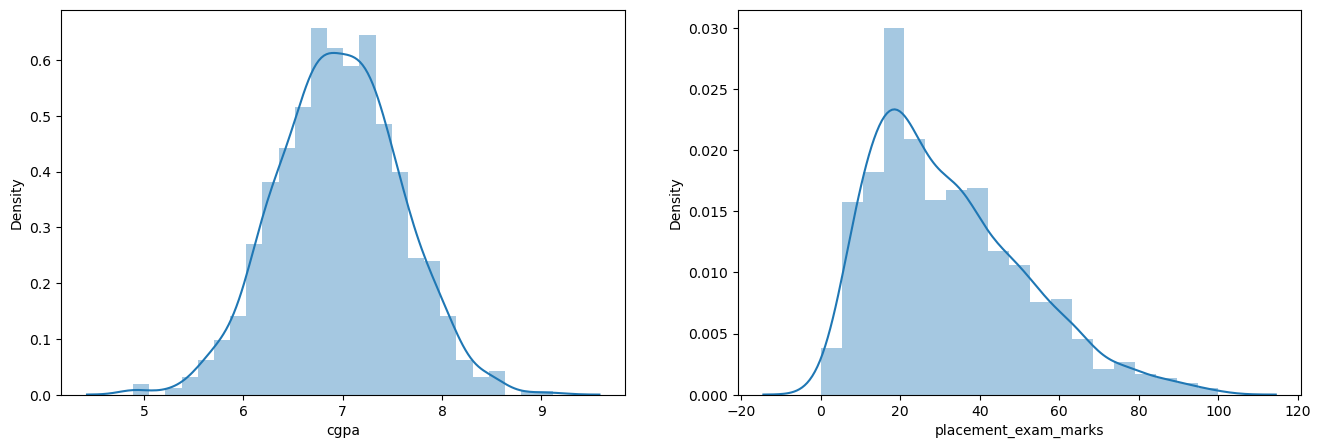

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sbn.distplot(df["cgpa"])

plt.subplot(122)
sbn.distplot(df["placement_exam_marks"])
plt.show()

### This technique is only applicable to skew data column and not for normal distribution data

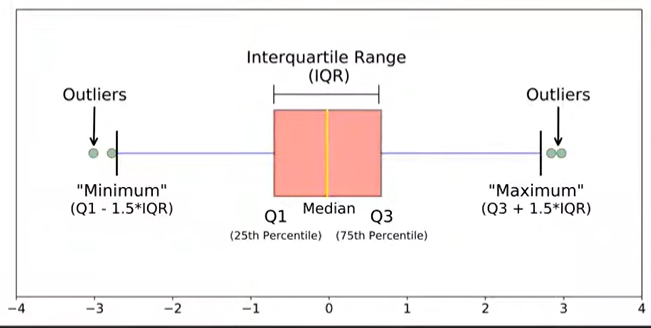

### IQR=Q3-Q1 (IQR formula)

In [8]:
df["placement_exam_marks"].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: >

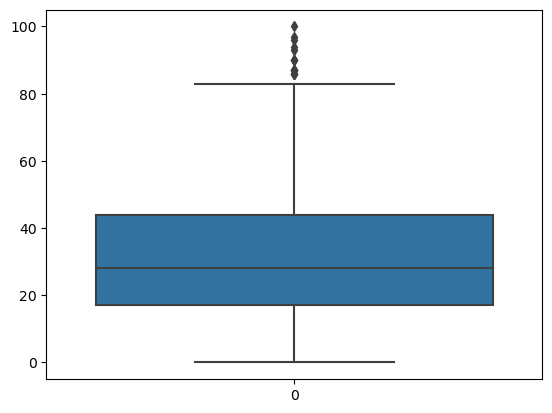

In [9]:
sbn.boxplot(df["placement_exam_marks"])

In [12]:
#Finding the IQR
Quartile25=df["placement_exam_marks"].quantile(0.25)
Quartile75=df["placement_exam_marks"].quantile(0.75)

In [13]:
IQR=Quartile75-Quartile25

In [14]:
IQR

27.0

In [16]:
upper_limit=Quartile75+ 1.5*IQR
lower_limit=Quartile25- 1.5*IQR

In [17]:
print("Upper Limit",upper_limit)
print("Lower Limit",lower_limit)

Upper Limit 84.5
Lower Limit -23.5


# Finding Outliers

In [18]:
df[df["placement_exam_marks"]>upper_limit]cat

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [19]:
df[df["placement_exam_marks"]<lower_limit]

,cgpa,placement_exam_marks,placed


#### lower_limit is -0.23 and the lowest value is 0 so there is  no outliers

## Trimming Outliers

In [21]:
new_df=df[df["placement_exam_marks"]<upper_limit]

In [23]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


#### u can see the from above data 15 columns are removed and size is now 985

In [24]:
new_df.shape

(985, 3)

C:\Users\acer\AppData\Local\Temp\ipykernel_2236\3480699110.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(df["placement_exam_marks"])
C:\Users\acer\AppData\Local\Temp\ipykernel_2236\3480699110.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(new_df["placement_exam_marks"])


<Axes: >

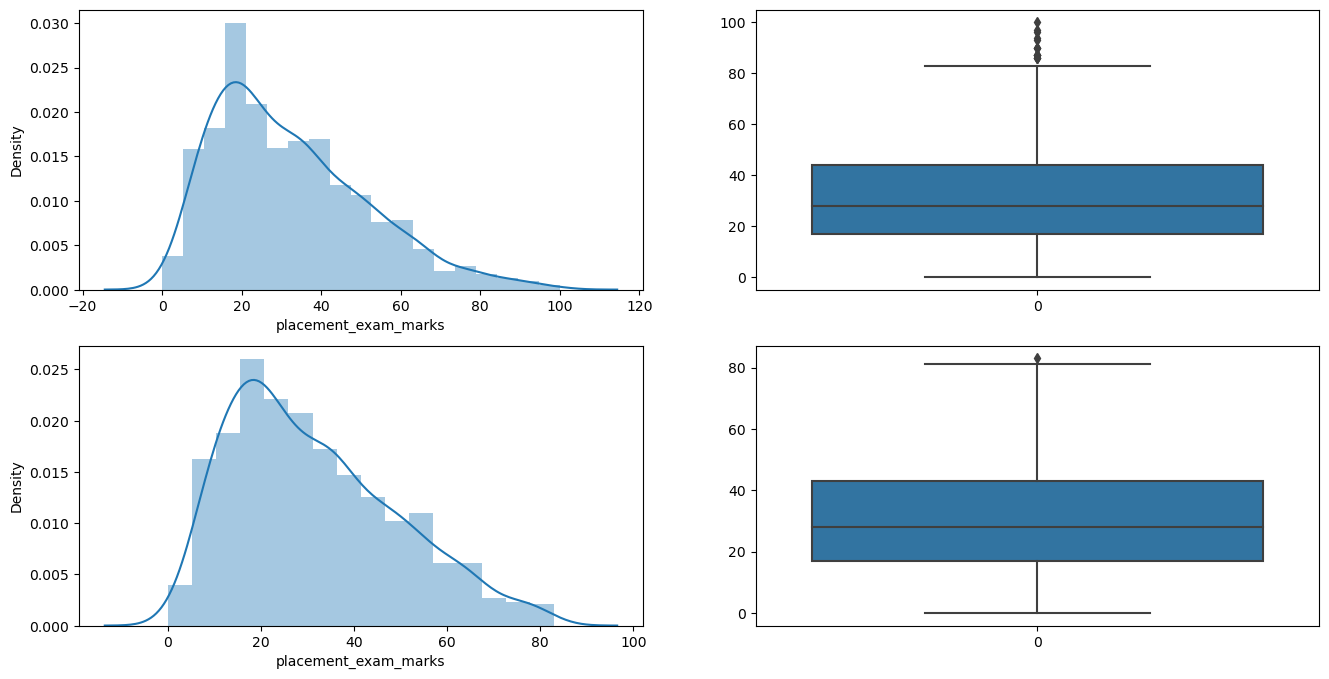

In [30]:
#comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sbn.distplot(df["placement_exam_marks"])
plt.subplot(2,2,2)
sbn.boxplot(df["placement_exam_marks"])

plt.subplot(2,2,3)
sbn.distplot(new_df["placement_exam_marks"])

plt.subplot(2,2,4)
sbn.boxplot(new_df["placement_exam_marks"])

#### From the above graph we can see that After applying IQR method is removed in new_df data as show in Boxplot also the distribution also varying

# Capping

In [32]:
new_df_cap=df.copy()
new_df_cap["placement_exam_marks"]=np.where(
    df["placement_exam_marks"]>upper_limit,
    upper_limit,
    np.where(
    df["placement_exam_marks"]<lower_limit,
    lower_limit,
    df["placement_exam_marks"])
    
)

In [33]:
new_df_cap.shape

(1000, 3)

### you can see that shape of data is same even after treating the outliers by using Capping technique

C:\Users\acer\AppData\Local\Temp\ipykernel_2236\1707011549.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(df["placement_exam_marks"])
C:\Users\acer\AppData\Local\Temp\ipykernel_2236\1707011549.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(new_df_cap["placement_exam_marks"])


<Axes: >

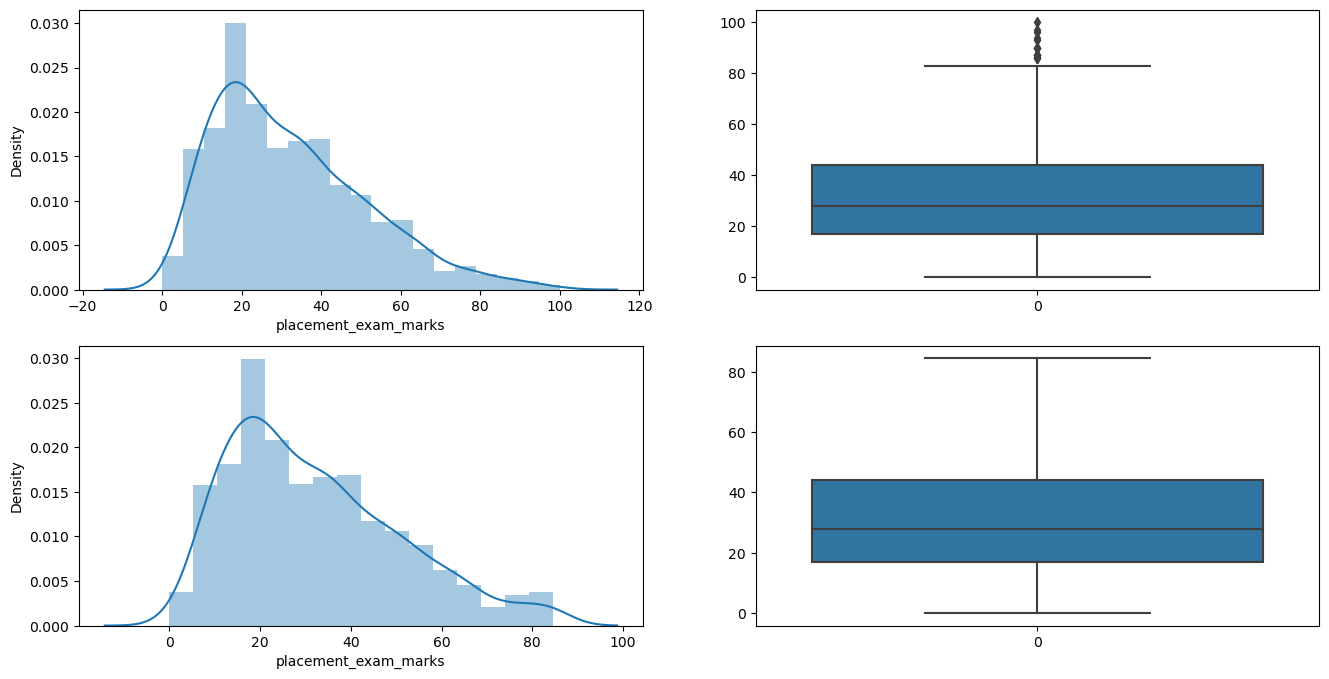

In [35]:
#Comparing

plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sbn.distplot(df["placement_exam_marks"])

plt.subplot(2,2,2)
sbn.boxplot(df["placement_exam_marks"])

plt.subplot(2,2,3)
sbn.distplot(new_df_cap["placement_exam_marks"])

plt.subplot(2,2,4)
sbn.boxplot(new_df_cap["placement_exam_marks"])

### From the above we can see that Outliers are treated well and capped properly , also removing of Outliers are done properly without removing any value. Also distribution of data is changed a little bit

# Conclude